Part 1: Image classification

    1. Set your random seed to 1234
    2. Load the MNIST dataset

In [1]:
import random
from keras.datasets import mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(1234)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_images, valid_images, train_labels, valid_labels = \
    train_test_split(train_images, train_labels, test_size = 0.16666, random_state = 1234)

/software/Anaconda3-5.0.1-el7-x86_64/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


    3.Implement a series of neural network models
     - Note: Using 512 as hidden units for hidden layers lead to really bad results, so I choose 128 instead for every following model.

        i.Initial test

In [7]:
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 9s 185us/step - loss: 14.1055 - acc: 0.1028 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 2/200
50000/50000 [==============================] - 9s 181us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 3/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 4/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 5/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 6/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 7/200
50000/50000 [==============================] - 9s 181us/step - loss: 14.4799 - acc: 0.1016 -

50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 59/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 60/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 61/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 62/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 63/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 64/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 65/200
50000/

50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 116/200
50000/50000 [==============================] - 9s 181us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 117/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 118/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 119/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 120/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 121/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 122/200

50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 173/200
50000/50000 [==============================] - 9s 178us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 174/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 175/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 176/200
50000/50000 [==============================] - 9s 180us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 177/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 178/200
50000/50000 [==============================] - 9s 179us/step - loss: 14.4799 - acc: 0.1016 - val_loss: 14.4273 - val_acc: 0.1049
Epoch 179/200

In [8]:
network_org.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


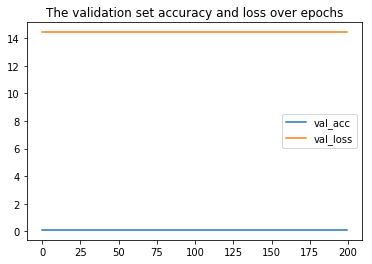

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.legend(['val_acc', 'val_loss'])
plt.title('The validation set accuracy and loss over epochs')
plt.show()

In [10]:
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 3s 57us/step - loss: 0.4353 - acc: 0.8742 - val_loss: 0.2797 - val_acc: 0.9176
Epoch 2/200
50000/50000 [==============================] - 3s 54us/step - loss: 0.2155 - acc: 0.9382 - val_loss: 0.2386 - val_acc: 0.9312
Epoch 3/200
50000/50000 [==============================] - 3s 53us/step - loss: 0.1564 - acc: 0.9551 - val_loss: 0.1431 - val_acc: 0.9570
Epoch 4/200
50000/50000 [==============================] - 3s 53us/step - loss: 0.1240 - acc: 0.9635 - val_loss: 0.1441 - val_acc: 0.9542
Epoch 5/200
50000/50000 [==============================] - 3s 54us/step - loss: 0.0996 - acc: 0.9713 - val_loss: 0.1295 - val_acc: 0.9625
Epoch 6/200
50000/50000 [==============================] - 3s 54us/step - loss: 0.0838 - acc: 0.9759 - val_loss: 0.0955 - val_acc: 0.9707
Epoch 7/200
50000/50000 [==============================] - 3s 53us/step - loss: 0.0694 - acc: 0.9792 - val_loss: 0.1055 - 

50000/50000 [==============================] - 3s 53us/step - loss: 0.0027 - acc: 0.9994 - val_loss: 0.0963 - val_acc: 0.9813
Epoch 60/200
50000/50000 [==============================] - 3s 54us/step - loss: 0.0028 - acc: 0.9992 - val_loss: 0.0950 - val_acc: 0.9808
Epoch 61/200
50000/50000 [==============================] - 3s 58us/step - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0952 - val_acc: 0.9817
Epoch 62/200
50000/50000 [==============================] - 3s 56us/step - loss: 0.0016 - acc: 0.9995 - val_loss: 0.0933 - val_acc: 0.9817
Epoch 63/200
50000/50000 [==============================] - 3s 57us/step - loss: 0.0019 - acc: 0.9994 - val_loss: 0.0928 - val_acc: 0.9818
Epoch 64/200
50000/50000 [==============================] - 3s 55us/step - loss: 0.0022 - acc: 0.9994 - val_loss: 0.0949 - val_acc: 0.9816
Epoch 65/200
50000/50000 [==============================] - 3s 54us/step - loss: 0.0013 - acc: 0.9996 - val_loss: 0.0943 - val_acc: 0.9818
Epoch 66/200
50000/50000 [==============

50000/50000 [==============================] - 3s 54us/step - loss: 7.9601e-04 - acc: 0.9998 - val_loss: 0.1191 - val_acc: 0.9811
Epoch 118/200
50000/50000 [==============================] - 3s 53us/step - loss: 4.9316e-04 - acc: 0.9998 - val_loss: 0.1215 - val_acc: 0.9810
Epoch 119/200
50000/50000 [==============================] - 3s 54us/step - loss: 7.6174e-04 - acc: 0.9998 - val_loss: 0.1209 - val_acc: 0.9812
Epoch 120/200
50000/50000 [==============================] - 3s 53us/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.1209 - val_acc: 0.9812
Epoch 121/200
50000/50000 [==============================] - 3s 54us/step - loss: 4.1481e-04 - acc: 0.9999 - val_loss: 0.1167 - val_acc: 0.9821
Epoch 122/200
50000/50000 [==============================] - 3s 53us/step - loss: 7.9998e-04 - acc: 0.9998 - val_loss: 0.1179 - val_acc: 0.9817
Epoch 123/200
50000/50000 [==============================] - 3s 54us/step - loss: 4.4288e-04 - acc: 0.9999 - val_loss: 0.1208 - val_acc: 0.9816
Epoch 124/

50000/50000 [==============================] - 3s 53us/step - loss: 4.5692e-04 - acc: 0.9999 - val_loss: 0.1371 - val_acc: 0.9820
Epoch 175/200
50000/50000 [==============================] - 3s 54us/step - loss: 6.2407e-04 - acc: 0.9998 - val_loss: 0.1697 - val_acc: 0.9783
Epoch 176/200
50000/50000 [==============================] - 3s 54us/step - loss: 6.1413e-05 - acc: 1.0000 - val_loss: 0.1317 - val_acc: 0.9825
Epoch 177/200
50000/50000 [==============================] - 3s 54us/step - loss: 2.3160e-04 - acc: 1.0000 - val_loss: 0.1304 - val_acc: 0.9816
Epoch 178/200
50000/50000 [==============================] - 3s 54us/step - loss: 6.6140e-04 - acc: 0.9998 - val_loss: 0.1318 - val_acc: 0.9812
Epoch 179/200
50000/50000 [==============================] - 3s 54us/step - loss: 0.0012 - acc: 0.9997 - val_loss: 0.1399 - val_acc: 0.9823
Epoch 180/200
50000/50000 [==============================] - 3s 53us/step - loss: 2.5252e-04 - acc: 0.9999 - val_loss: 0.2172 - val_acc: 0.9717
Epoch 181/

In [11]:
network_org.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


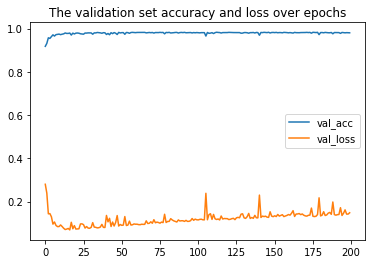

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.legend(['val_acc', 'val_loss'])
plt.title('The validation set accuracy and loss over epochs')
plt.show()

Identify the epoch where the model's performance degrades based on the validation set:

#From Epoch 12, the model starts to perform worse and worse.

        ii. Implement dropout

In [10]:
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(128, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(128, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(128, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))
network_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = network_dropout.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 87us/step - loss: 1.3082 - acc: 0.5415 - val_loss: 0.4453 - val_acc: 0.8821
Epoch 2/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.6373 - acc: 0.8063 - val_loss: 0.3061 - val_acc: 0.9123
Epoch 3/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.4704 - acc: 0.8683 - val_loss: 0.2482 - val_acc: 0.9303
Epoch 4/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.3833 - acc: 0.8962 - val_loss: 0.2073 - val_acc: 0.9422
Epoch 5/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.3335 - acc: 0.9134 - val_loss: 0.1833 - val_acc: 0.9492
Epoch 6/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.3040 - acc: 0.9208 - val_loss: 0.1646 - val_acc: 0.9524
Epoch 7/200
50000/50000 [==============================] - 4s 81us/step - loss: 0.2752 - acc: 0.9299 - val_loss: 0.1650 - 

50000/50000 [==============================] - 4s 81us/step - loss: 12.7716 - acc: 0.2076 - val_loss: 12.6293 - val_acc: 0.2164
Epoch 118/200
50000/50000 [==============================] - 4s 81us/step - loss: 13.0252 - acc: 0.1919 - val_loss: 14.2081 - val_acc: 0.1185
Epoch 119/200
50000/50000 [==============================] - 4s 81us/step - loss: 12.7510 - acc: 0.2089 - val_loss: 12.2988 - val_acc: 0.2368
Epoch 120/200
50000/50000 [==============================] - 4s 81us/step - loss: 12.2590 - acc: 0.2394 - val_loss: 11.5486 - val_acc: 0.2834
Epoch 121/200
50000/50000 [==============================] - 4s 80us/step - loss: 12.4613 - acc: 0.2268 - val_loss: 10.5106 - val_acc: 0.3479
Epoch 122/200
50000/50000 [==============================] - 4s 82us/step - loss: 12.3616 - acc: 0.2330 - val_loss: 13.3490 - val_acc: 0.1718
Epoch 123/200
50000/50000 [==============================] - 4s 82us/step - loss: 12.8261 - acc: 0.2042 - val_loss: 11.4505 - val_acc: 0.2893
Epoch 124/200
50000/

Epoch 175/200
50000/50000 [==============================] - 4s 81us/step - loss: 13.7316 - acc: 0.1481 - val_loss: 14.2339 - val_acc: 0.1169
Epoch 176/200
50000/50000 [==============================] - 4s 81us/step - loss: 13.7985 - acc: 0.1439 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 177/200
50000/50000 [==============================] - 4s 81us/step - loss: 13.8712 - acc: 0.1394 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 178/200
50000/50000 [==============================] - 4s 81us/step - loss: 13.9997 - acc: 0.1314 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 179/200
50000/50000 [==============================] - 4s 81us/step - loss: 14.0321 - acc: 0.1294 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 180/200
50000/50000 [==============================] - 4s 81us/step - loss: 13.8948 - acc: 0.1379 - val_loss: 13.0541 - val_acc: 0.1901
Epoch 181/200
50000/50000 [==============================] - 4s 82us/step - loss: 13.6851 - acc: 0.1509 - val_loss: 12.8639 - val_acc: 0.2019
Epoch 

In [11]:
network_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
__________

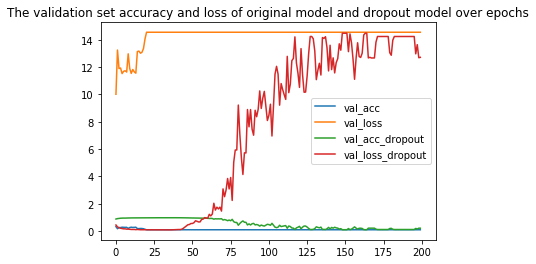

In [12]:
val_acc = result_org.history['val_acc']
val_loss = result_org.history['val_loss']
val_acc_dropout = result_dropout.history['val_acc']
val_loss_dropout = result_dropout.history['val_loss']
plt.plot(val_acc)
plt.plot(val_loss)
plt.plot(val_acc_dropout)
plt.plot(val_loss_dropout)
plt.legend(['val_acc', 'val_loss', 'val_acc_dropout', 'val_loss_dropout'])
plt.title('The validation set accuracy and loss of original model and dropout model over epochs')
plt.show()

How does this new model perform relative to the old model?

This model perform much better compared with the old model in terms of val_loss and val_acc, especailly when epoch number is smaller than 75.

        iii.Weight regularization

In [14]:
network_l1 = models.Sequential()
network_l1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(10, activation='softmax'))
network_l1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1 = network_l1.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 82us/step - loss: 10.6262 - acc: 0.5399 - val_loss: 11.9664 - val_acc: 0.4247
Epoch 2/200
50000/50000 [==============================] - 4s 76us/step - loss: 15.8846 - acc: 0.2743 - val_loss: 16.2500 - val_acc: 0.1910
Epoch 3/200
50000/50000 [==============================] - 4s 76us/step - loss: 16.1868 - acc: 0.1988 - val_loss: 15.5508 - val_acc: 0.2000
Epoch 4/200
50000/50000 [==============================] - 4s 76us/step - loss: 16.4884 - acc: 0.1160 - val_loss: 16.7651 - val_acc: 0.0975
Epoch 5/200
50000/50000 [==============================] - 4s 76us/step - loss: 16.2562 - acc: 0.1027 - val_loss: 16.2743 - val_acc: 0.1001
Epoch 6/200
50000/50000 [==============================] - 4s 76us/step - loss: 15.7613 - acc: 0.1158 - val_loss: 15.0178 - val_acc: 0.1518
Epoch 7/200
50000/50000 [==============================] - 4s 76us/step - loss: 15.0513 - acc: 0.1616 - val_lo

Epoch 59/200
50000/50000 [==============================] - 4s 76us/step - loss: 12.7709 - acc: 0.2682 - val_loss: 12.9741 - val_acc: 0.2532
Epoch 60/200
50000/50000 [==============================] - 4s 76us/step - loss: 12.7597 - acc: 0.2676 - val_loss: 12.8172 - val_acc: 0.2627
Epoch 61/200
50000/50000 [==============================] - 4s 76us/step - loss: 12.7173 - acc: 0.2688 - val_loss: 12.7022 - val_acc: 0.2695
Epoch 62/200
50000/50000 [==============================] - 4s 76us/step - loss: 12.6803 - acc: 0.2699 - val_loss: 12.7287 - val_acc: 0.2664
Epoch 63/200
50000/50000 [==============================] - 4s 76us/step - loss: 12.6419 - acc: 0.2710 - val_loss: 12.7079 - val_acc: 0.2672
Epoch 64/200
50000/50000 [==============================] - 4s 76us/step - loss: 12.6178 - acc: 0.2716 - val_loss: 12.6505 - val_acc: 0.2694
Epoch 65/200
50000/50000 [==============================] - 4s 76us/step - loss: 12.5840 - acc: 0.2724 - val_loss: 12.6739 - val_acc: 0.2661
Epoch 66/200


50000/50000 [==============================] - 4s 76us/step - loss: 14.8873 - acc: 0.1634 - val_loss: 13.1015 - val_acc: 0.2511
Epoch 118/200
50000/50000 [==============================] - 4s 76us/step - loss: 14.7959 - acc: 0.1422 - val_loss: 13.9185 - val_acc: 0.1784
Epoch 119/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.6090 - acc: 0.1791 - val_loss: 13.6950 - val_acc: 0.1437
Epoch 120/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5043 - acc: 0.1786 - val_loss: 13.6601 - val_acc: 0.1833
Epoch 121/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.4225 - acc: 0.1838 - val_loss: 13.1623 - val_acc: 0.1838
Epoch 122/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.4832 - acc: 0.1841 - val_loss: 13.5916 - val_acc: 0.1828
Epoch 123/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5337 - acc: 0.1834 - val_loss: 13.5341 - val_acc: 0.1841
Epoch 124/200
50000/

Epoch 175/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5551 - acc: 0.1839 - val_loss: 13.5740 - val_acc: 0.1825
Epoch 176/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5508 - acc: 0.1835 - val_loss: 13.5694 - val_acc: 0.1824
Epoch 177/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5432 - acc: 0.1841 - val_loss: 13.5555 - val_acc: 0.1834
Epoch 178/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5336 - acc: 0.1842 - val_loss: 13.5903 - val_acc: 0.1801
Epoch 179/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5254 - acc: 0.1847 - val_loss: 13.5638 - val_acc: 0.1816
Epoch 180/200
50000/50000 [==============================] - 4s 76us/step - loss: 13.5226 - acc: 0.1842 - val_loss: 13.5407 - val_acc: 0.1829
Epoch 181/200
50000/50000 [==============================] - 4s 77us/step - loss: 13.5184 - acc: 0.1840 - val_loss: 13.5239 - val_acc: 0.1840
Epoch 

In [15]:
network_l1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_23 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_24 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_25 (Dense)             (None, 10)                1290      
Total params: 501,898
Trainable params: 501,898
Non-trainable params: 0
_________________________________________________________________


In [16]:
network_l2 = models.Sequential()
network_l2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2 = network.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 11s 223us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 2/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 3/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 4/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 5/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 6/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 7/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0

50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 59/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 60/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 61/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 62/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 63/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 64/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 65/200

Epoch 172/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 173/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 174/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 175/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 176/200
50000/50000 [==============================] - 11s 214us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 177/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc: 0.1168
Epoch 178/200
50000/50000 [==============================] - 11s 213us/step - loss: 14.3213 - acc: 0.1115 - val_loss: 14.2355 - val_acc:

In [17]:
network_l2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_27 (Dense)             (None, 128)               65664     
_________________________________________________________________
dense_28 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 10)                1290      
Total params: 501,898
Trainable params: 501,898
Non-trainable params: 0
_________________________________________________________________


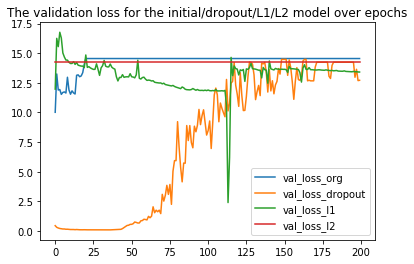

In [18]:
val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_l1 = result_l1.history['val_loss']
val_loss_l2 = result_l2.history['val_loss']
plt.plot(val_loss_org)
plt.plot(val_loss_dropout)
plt.plot(val_loss_l1)
plt.plot(val_loss_l2)
plt.legend(['val_loss_org', 'val_loss_dropout', 'val_loss_l1', 'val_loss_l2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.show()

Which model appears to perform the best?

In [2]:
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_org.add(layers.Dense(512, activation='relu'))
# network_org.add(layers.Dense(512, activation='relu'))
# network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 133us/step - loss: 1.7649 - acc: 0.6585 - val_loss: 1.0275 - val_acc: 0.7803
Epoch 2/200
50000/50000 [==============================] - 5s 98us/step - loss: 3.2435 - acc: 0.6675 - val_loss: 3.6329 - val_acc: 0.6712
Epoch 3/200
50000/50000 [==============================] - 5s 97us/step - loss: 3.9670 - acc: 0.6780 - val_loss: 3.1512 - val_acc: 0.7344
Epoch 4/200
50000/50000 [==============================] - 5s 98us/step - loss: 4.3288 - acc: 0.6796 - val_loss: 4.9279 - val_acc: 0.6458
Epoch 5/200
50000/50000 [==============================] - 5s 97us/step - loss: 4.1463 - acc: 0.7054 - val_loss: 3.9059 - val_acc: 0.7276
Epoch 6/200
50000/50000 [==============================] - 5s 97us/step - loss: 3.6042 - acc: 0.7451 - val_loss: 

Epoch 55/200
50000/50000 [==============================] - 5s 98us/step - loss: 3.9057 - acc: 0.7566 - val_loss: 4.1858 - val_acc: 0.7392
Epoch 56/200
50000/50000 [==============================] - 5s 99us/step - loss: 3.7354 - acc: 0.7671 - val_loss: 4.4283 - val_acc: 0.7242
Epoch 57/200
50000/50000 [==============================] - 5s 97us/step - loss: 3.7044 - acc: 0.7691 - val_loss: 4.0864 - val_acc: 0.7452
Epoch 58/200
50000/50000 [==============================] - 5s 97us/step - loss: 3.7326 - acc: 0.7673 - val_loss: 3.8605 - val_acc: 0.7599
Epoch 59/200
50000/50000 [==============================] - 5s 98us/step - loss: 3.6578 - acc: 0.7720 - val_loss: 5.6356 - val_acc: 0.6490
Epoch 60/200
50000/50000 [==============================] - 5s 98us/step - loss: 3.7723 - acc: 0.7651 - val_loss: 3.2136 - val_acc: 0.7998
Epoch 61/200
50000/50000 [==============================] - 5s 97us/step - loss: 3.7884 - acc: 0.7639 - val_loss: 4.2376 - val_acc: 0.7361
Epoch 62/200
50000/50000 [=

KeyboardInterrupt: 

In [5]:
network_org = models.Sequential()
network_org.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_org.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
# network_org.add(layers.Dense(512, activation='relu'))
# network_org.add(layers.Dense(512, activation='relu'))
# network_org.add(layers.Dense(512, activation='relu'))
network_org.add(layers.Dense(10, activation='softmax'))
network_org.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_org = network_org.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=20, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 5s 109us/step - loss: 1.7930 - acc: 0.6578 - val_loss: 2.8803 - val_acc: 0.6146
Epoch 2/20
50000/50000 [==============================] - 6s 119us/step - loss: 3.8689 - acc: 0.6448 - val_loss: 4.1106 - val_acc: 0.6557
Epoch 3/20
50000/50000 [==============================] - 5s 108us/step - loss: 6.7988 - acc: 0.5263 - val_loss: 7.9614 - val_acc: 0.4838
Epoch 4/20
50000/50000 [==============================] - 5s 98us/step - loss: 7.1396 - acc: 0.5314 - val_loss: 6.7406 - val_acc: 0.5653
Epoch 5/20
50000/50000 [==============================] - 5s 100us/step - loss: 7.1524 - acc: 0.5383 - val_loss: 6.9528 - val_acc: 0.5536
Epoch 6/20
50000/50000 [==============================] - 5s 99us/step - loss: 7.0643 - acc: 0.5501 - val_loss: 8.8859 - val_acc: 0.4344
Epoch 7/20
50000/50000 [==============================] - 5s 98us/step - loss: 7.0434 - acc: 0.5532 - val_loss: 6.6976 - val

In [4]:
network_org.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
network_dropout = models.Sequential()
network_dropout.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(512, activation='relu'))
network_dropout.add(layers.Dropout(0.5))
network_dropout.add(layers.Dense(10, activation='softmax'))
network_dropout.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_dropout = network_dropout.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

In [ ]:
network_l1 = models.Sequential()
network_l1.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
network_l1.add(layers.Dense(10, activation='softmax'))
network_l1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l1 = network_l1.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 10s 201us/step - loss: 29.4562 - acc: 0.1101 - val_loss: 18.5410 - val_acc: 0.1168
Epoch 2/200
50000/50000 [==============================] - 10s 194us/step - loss: 17.6557 - acc: 0.1034 - val_loss: 17.5428 - val_acc: 0.0918
Epoch 3/200
50000/50000 [==============================] - 10s 194us/step - loss: 17.0672 - acc: 0.0963 - val_loss: 17.0719 - val_acc: 0.0912
Epoch 4/200
50000/50000 [==============================] - 10s 193us/step - loss: 16.3921 - acc: 0.1052 - val_loss: 16.3184 - val_acc: 0.0975
Epoch 5/200
50000/50000 [==============================] - 10s 193us/step - loss: 16.1869 - acc: 0.1032 - val_loss: 16.1665 - val_acc: 0.1018
Epoch 6/200
50000/50000 [==============================] - 10s 193us/step - loss: 16.1658 - acc: 0.0984 - val_loss: 16.0976 - val_acc: 0.0978
Epoch 7/200
50000/50000 [==============================] - 10s 194us/step - loss: 15.8934 - acc: 0

In [ ]:
network_l2 = models.Sequential()
network_l2.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_l2.add(layers.Dense(10, activation='softmax'))
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_l2 = network.fit(train_images, train_labels,validation_data=(valid_images,valid_labels), epochs=200, batch_size=512)

In [ ]:
val_loss_org = result_org.history['val_loss']
val_loss_dropout = result_dropout.history['val_loss']
val_loss_l1 = result_l1.history['val_loss']
val_loss_l2 = result_l2.history['val_loss']
plt.plot(val_loss_org)
plt.plot(val_loss_dropout)
plt.plot(val_loss_l1)
plt.plot(val_loss_l2)
plt.legend(['val_loss_org', 'val_loss_dropout', 'val_loss_l1', 'val_loss_l2'])
plt.title('The validation loss for the initial/dropout/L1/L2 model over epochs')
plt.show()

        iv. Final model

In [45]:
network_best = models.Sequential()
network_best.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,), kernel_regularizer=regularizers.l2(0.001)))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
network_best.add(layers.Dropout(0.5))
network_best.add(layers.Dense(10, activation='softmax'))
network_best.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
result_best = network_best.fit(train_images, train_labels, epochs=10, batch_size=512)

Epoch 1/10
50000/50000 [==============================] - 5s 90us/step - loss: 2.0718 - acc: 0.5519
Epoch 2/10
50000/50000 [==============================] - 4s 74us/step - loss: 1.2295 - acc: 0.8149
Epoch 3/10
50000/50000 [==============================] - 4s 74us/step - loss: 0.9919 - acc: 0.8644
Epoch 4/10
50000/50000 [==============================] - 4s 72us/step - loss: 0.8558 - acc: 0.8874
Epoch 5/10
50000/50000 [==============================] - 4s 74us/step - loss: 0.7606 - acc: 0.8997
Epoch 6/10
50000/50000 [==============================] - 4s 74us/step - loss: 0.6921 - acc: 0.9084
Epoch 7/10
50000/50000 [==============================] - 4s 74us/step - loss: 0.6506 - acc: 0.9106
Epoch 8/10
50000/50000 [==============================] - 4s 74us/step - loss: 0.6114 - acc: 0.9146
Epoch 9/10
50000/50000 [==============================] - 4s 75us/step - loss: 0.5888 - acc: 0.9198
Epoch 10/10
50000/50000 [==============================] - 4s 75us/step - loss: 0.5700 - acc: 0.9214

In [ ]:
network_best.summary()

In [48]:
network_best.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 93us/step


[0.4371046806335449, 0.9525]

Calcuate the test set loss and accuracy. How well does your model perform to the baseline from chapter 2.1 in the book? 0.9785

Part 2: Scalar regression

In [ ]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [ ]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
return model

In [ ]:
import numpy as np
k = 10
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [ ]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
    if smoothed_points:
        previous = smoothed_points[-1]
        smoothed_points.append(previous * factor + point * (1 - factor))
    else:
        smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)